In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

from windstress import ra_windstr
from windstress_curl import ra_windstrcurl

In [2]:
ncfile = "cmems_obs-wind_glo_phy_nrt_l4_0.125deg_PT1H_1761115052002.nc"
with xr.open_dataset(ncfile) as ds:
    lon = ds["longitude"].values
    lat = ds["latitude"].values
    u = ds["eastward_wind"].values.squeeze()
    v = ds["northward_wind"].values.squeeze()
    taux_init = ds["eastward_stress"].values.squeeze()
    tauy_init = ds["northward_stress"].values.squeeze()
    WSC_init = ds["stress_curl"].values.squeeze()

In [3]:
type(u)

numpy.ndarray

In [4]:
taux_cal, tauy_cal = ra_windstr(u, v)
WSC_cal = ra_windstrcurl(lat, lon, u, v)

#### Compare initial Wind Stress

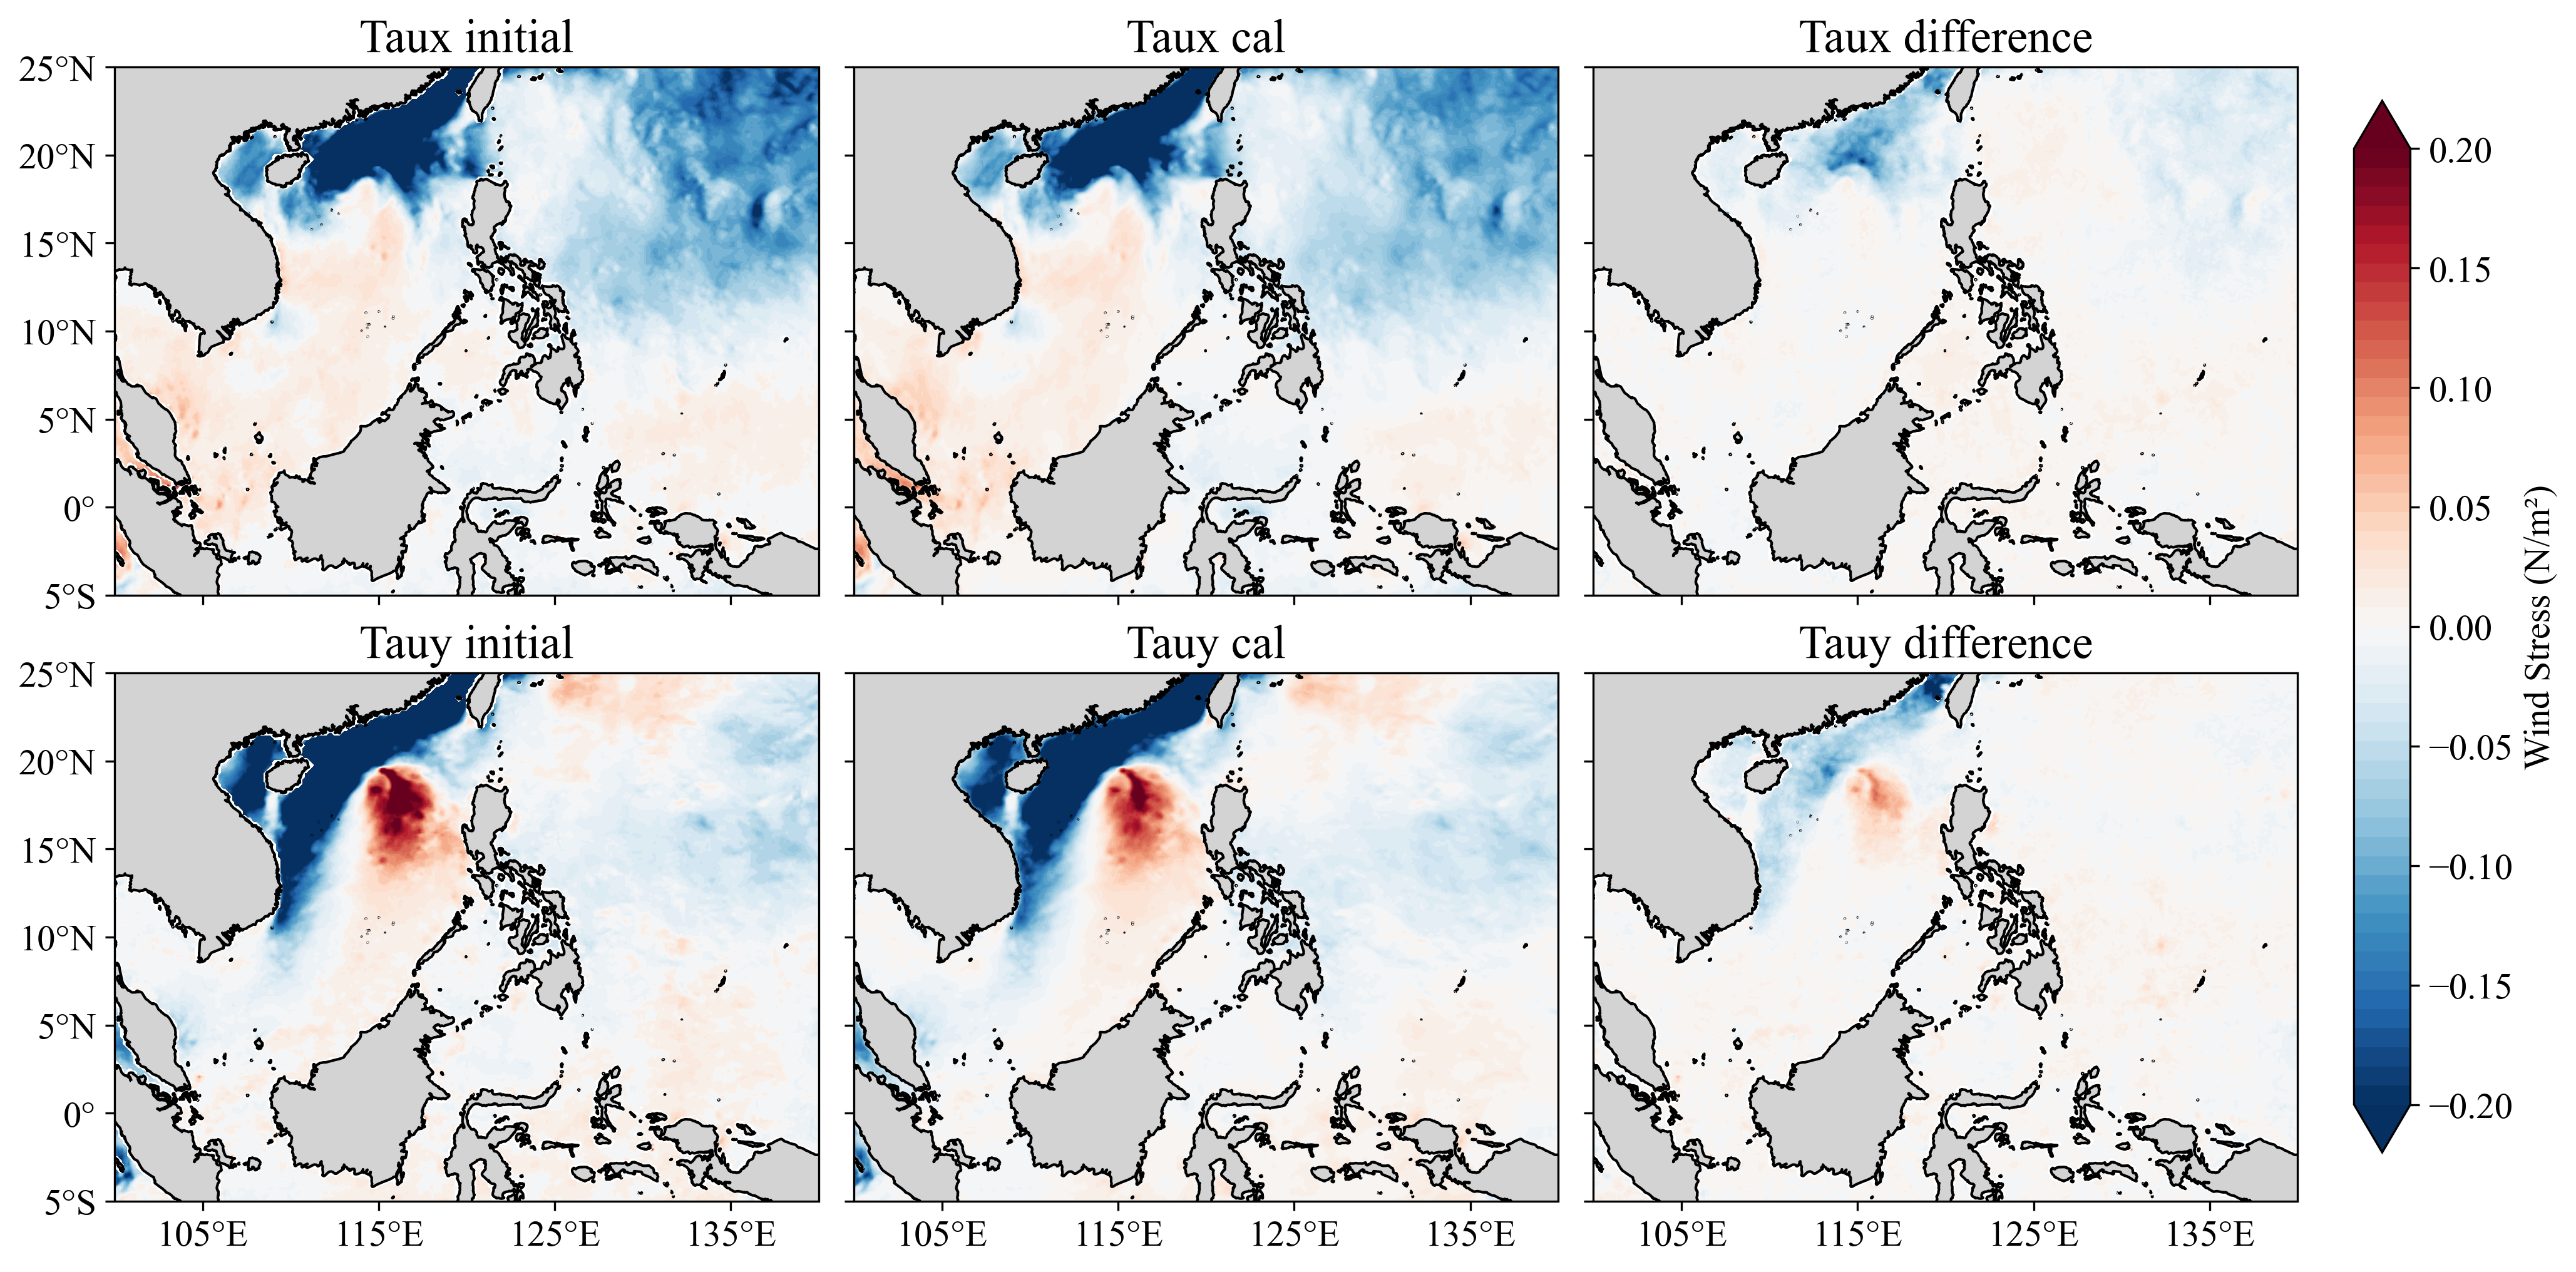

In [5]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
lon2d, lat2d = np.meshgrid(lon, lat)

fig, axes = plt.subplots(
    2, 3, figsize=(15, 8), subplot_kw={"projection": ccrs.PlateCarree()}, dpi=300
)
level = np.linspace(-0.2, 0.2, 51)


titles = [
    "Taux initial",
    "Taux cal",
    "Taux difference",
    "Tauy initial",
    "Tauy cal",
    "Tauy difference",
]
datas = [taux_init, taux_cal, taux_init - taux_cal, tauy_init, tauy_cal, tauy_init - tauy_cal]

cfs = []
for i, (ax, data, title) in enumerate(zip(axes.flat, datas, titles)):
    cf = ax.contourf(
        lon2d,
        lat2d,
        data,
        levels=level,
        cmap="RdBu_r",
        transform=ccrs.PlateCarree(),
        extend="both",
        zorder=1,
    )
    ax.add_feature(cfeature.LAND, color="lightgray", zorder=2)
    ax.coastlines(resolution="10m", zorder=3)

    ax.set_xticks(np.arange(105, 140 + 1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-5, 25 + 1, 5), crs=ccrs.PlateCarree())
    ax.set_extent([100, 140, -5, 25], crs=ccrs.PlateCarree())

    lon_formatter = LongitudeFormatter(zero_direction_label=True, degree_symbol="°")
    lat_formatter = LatitudeFormatter(degree_symbol="°")
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    if i < 3:
        ax.set_xticklabels([])

    if i % 3 in [1, 2]:
        ax.set_yticklabels([])

    ax.set_title(title, fontsize=18)
    cfs.append(cf)

plt.subplots_adjust(wspace=0.05, hspace=0.1)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(
    cfs[0], cax=cbar_ax, label="Wind Stress (N/m²)", ticks=np.linspace(-0.2, 0.2, 9)
)

plt.show()

#### Compare initial Wind Stress curl

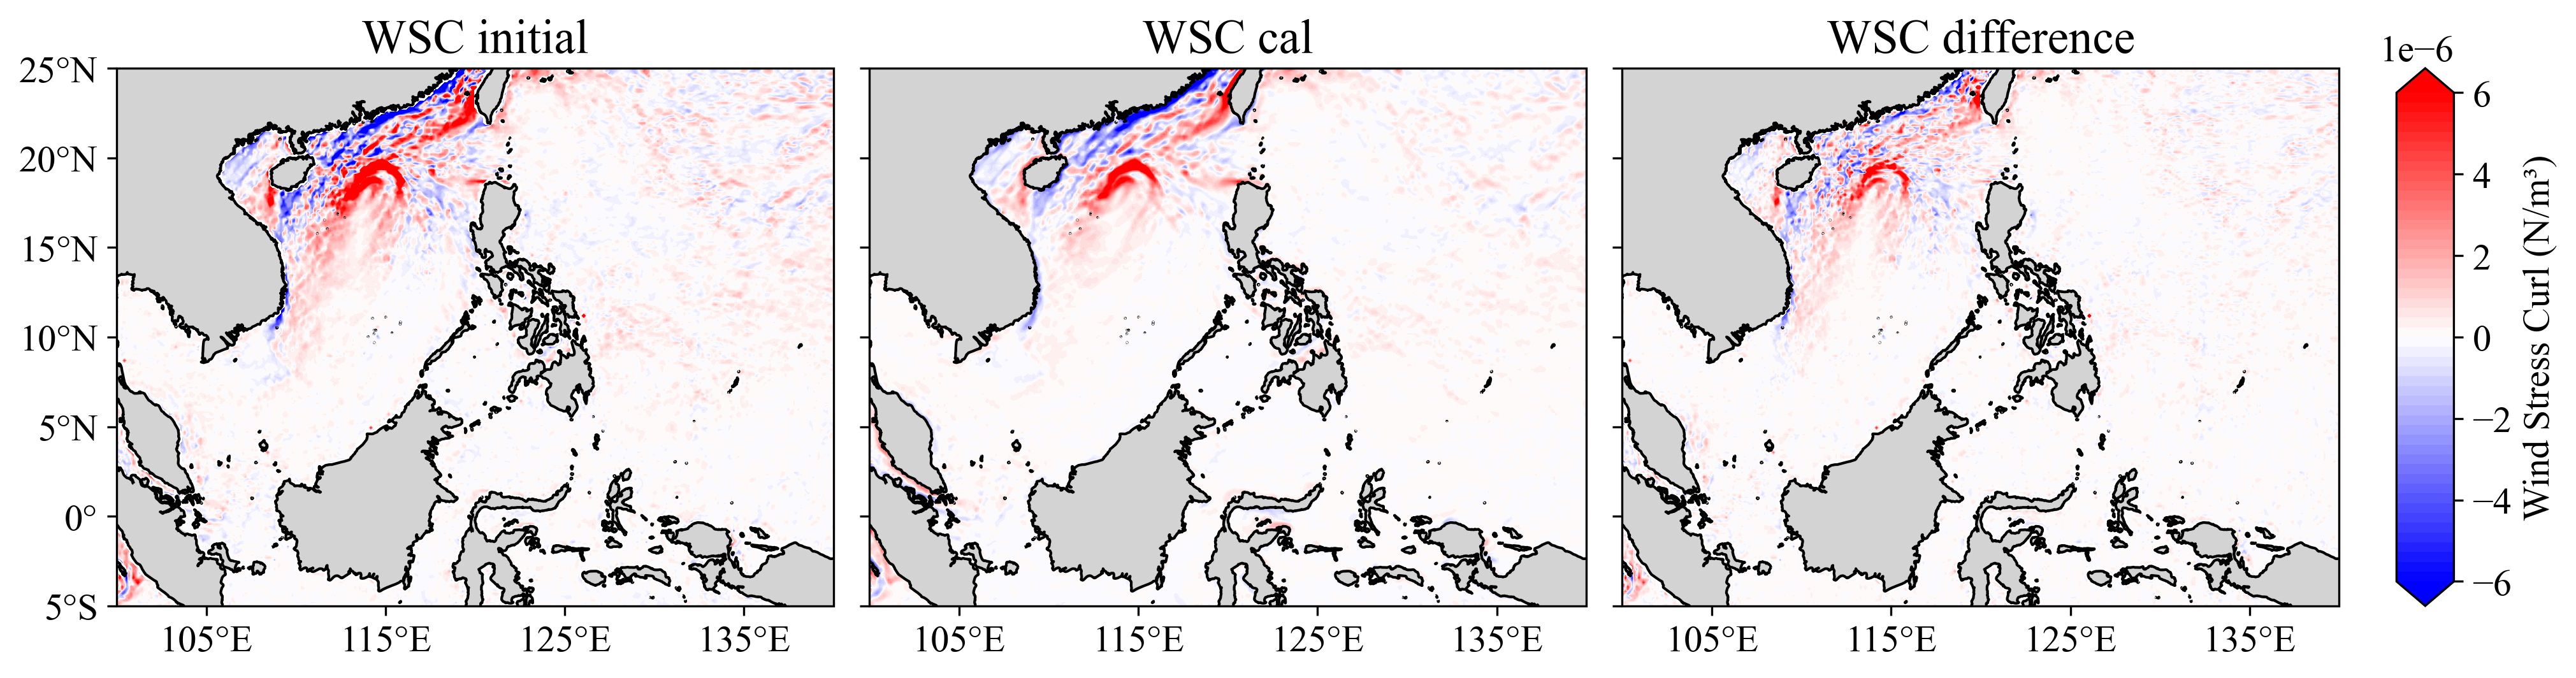

In [6]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
lon2d, lat2d = np.meshgrid(lon, lat)

fig, axes = plt.subplots(
    1, 3, figsize=(15, 8), subplot_kw={"projection": ccrs.PlateCarree()}, dpi=300
)
level = np.linspace(-6e-6, 6e-6, 51)

# 修改为三个子图：原始wsc、计算wsc、差值
titles = ["WSC initial", "WSC cal", "WSC difference"]
datas = [WSC_init, WSC_cal, WSC_init - WSC_cal]  # 假设你的wsc数据变量名为wsc_init和wsc_cal

cfs = []
for i, (ax, data, title) in enumerate(zip(axes.flat, datas, titles)):
    cf = ax.contourf(
        lon2d,
        lat2d,
        data,
        levels=level,
        cmap="bwr",
        transform=ccrs.PlateCarree(),
        extend="both",
        zorder=1,
    )
    ax.add_feature(cfeature.LAND, color="lightgray", zorder=2)
    ax.coastlines(resolution="10m", zorder=3)

    ax.set_xticks(np.arange(105, 140 + 1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-5, 25 + 1, 5), crs=ccrs.PlateCarree())
    ax.set_extent([100, 140, -5, 25], crs=ccrs.PlateCarree())

    lon_formatter = LongitudeFormatter(zero_direction_label=True, degree_symbol="°")
    lat_formatter = LatitudeFormatter(degree_symbol="°")
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # 对于第一列和第二列的子图，去掉y轴刻度标签
    if i in [1, 2]:
        ax.set_yticklabels([])

    ax.set_title(title, fontsize=18)
    cfs.append(cf)

plt.subplots_adjust(wspace=0.05)  # 只需要调整水平间距
fig.subplots_adjust(right=0.90)

ax_pos = axes[2].get_position()
cbar_left = ax_pos.x1 + 0.02
cbar_bottom = ax_pos.y0
cbar_height = ax_pos.height
cbar_width = 0.02

cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])

cbar = fig.colorbar(
    cfs[0], cax=cbar_ax, label="Wind Stress Curl (N/m³)", ticks=np.linspace(-6e-6, 6e-6, 7)
)

plt.show()